In [1]:
import SigVarGen as svg
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
domain = 'Arduino Board'

fs = max(svg.EMBEDDED_DEVICE_RANGES[domain]['frequency'])*2  # sampling rate in Hz
duration = 0.1  # seconds
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples, endpoint=False)

n_sinusoids = random.randint(20, 50)

drop = False

In [3]:
signal_range, interrupt_range = svg.generate_device_parameters(svg.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.5)

In [4]:
amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

In [5]:
base_wave, sinusoids_params = svg.generate_signal(t, n_sinusoids, amplitude_range, frequency_range)

In [6]:
np.min(base_wave)

0.0

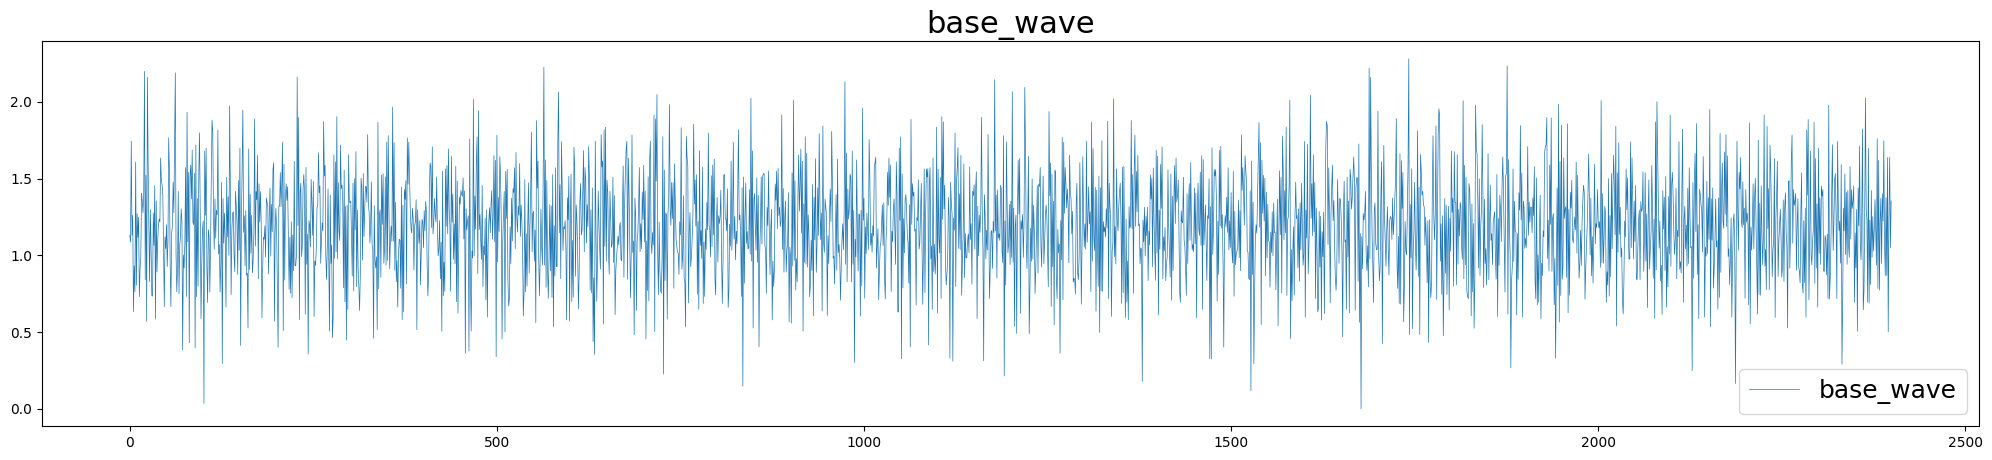

In [7]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=0.5)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [8]:
var_wave = svg.add_interrupt_bursts(t, base_wave.copy(), domain, {'Arduino Board': {'amplitude': (0, 3), 'frequency': (0, 10000.0)}}, device_min=0, device_max=4, temp=0,
    start_idx=0, end_idx=0, n_small_interrupts=20, non_overlap=False, small_duration_ratio_range=(0.001,0.009))

(1236, 1253)
(2149, 2170)
(1218, 1234)
(1022, 1036)
(927, 945)
(975, 980)
(96, 104)
(2269, 2282)
(691, 705)
(480, 484)
(767, 785)
(428, 440)
(1822, 1831)
(1362, 1378)
(896, 912)
(59, 74)
(2372, 2376)
(1449, 1464)
(1362, 1375)
(2091, 2096)


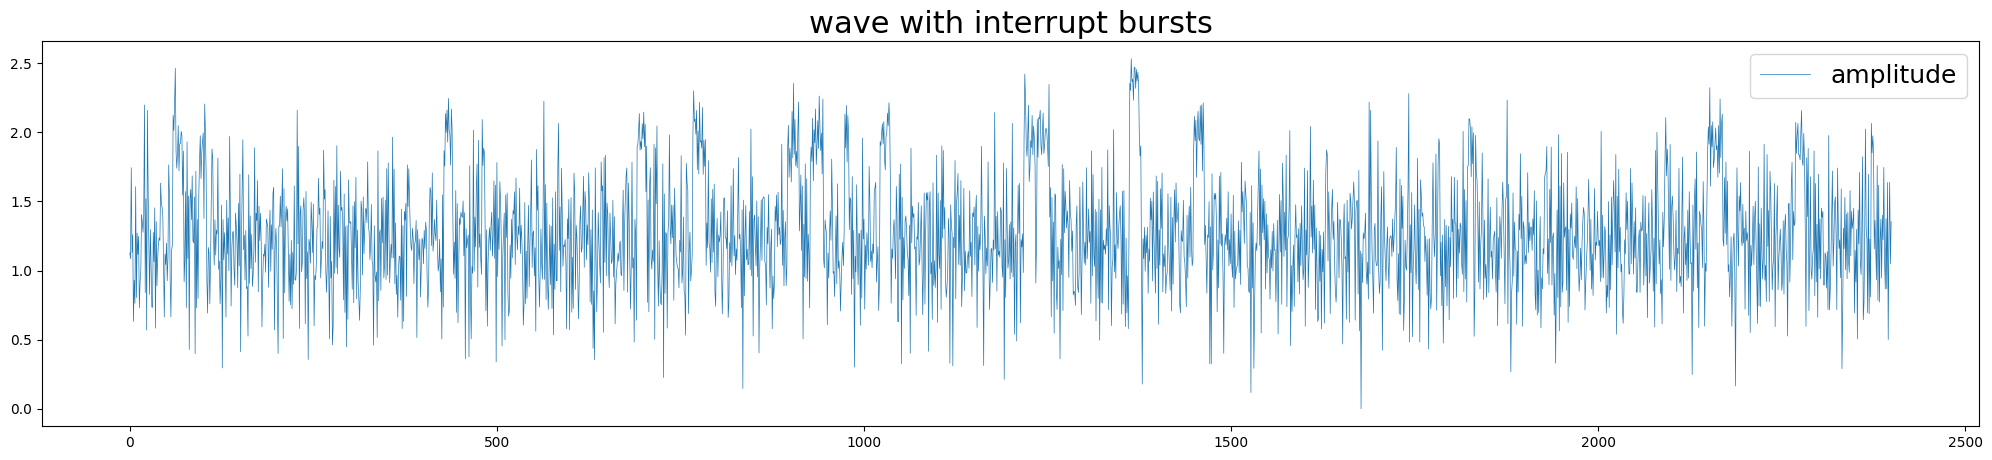

In [9]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(var_wave)), var_wave, label='amplitude', linewidth=0.5)
plt.title(f"wave with interrupt bursts", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [10]:
wave, interrupt_params = svg.add_interrupt_with_params(t, var_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.1, disperse=True, drop=drop, complex_iter=2, shrink_complex=True, blend_factor=0)

(1677, 1917)
(1976, 2125)


In [11]:
max(wave)

3.407526674589695

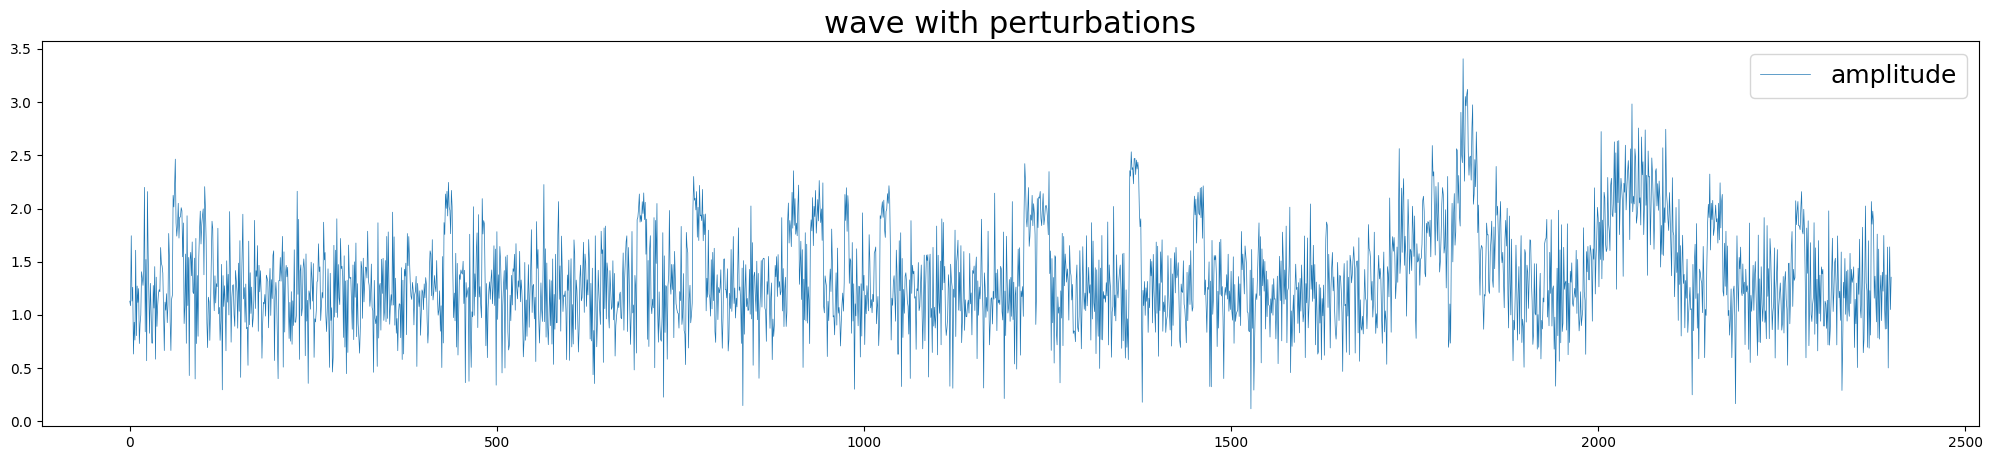

In [12]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='amplitude', linewidth=0.5)
plt.title(f"wave with perturbations", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [13]:
domain = 'Cameras'

fs = max(svg.EMBEDDED_DEVICE_RANGES[domain]['frequency'])*2  # sampling rate in Hz
duration = 2.5  # seconds
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples, endpoint=False)

n_sinusoids = 10 #random.randint(20, 50)

drop = True

In [14]:
signal_range, interrupt_range = svg.generate_device_parameters(svg.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.5)

amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

frequency_subrange_key = 0 #random.choice(list(frequency_range.keys())) - if multiple frequency ranges per domain

base_frequency_range = (frequency_range[0], frequency_range[0] + (frequency_range[1] - frequency_range[0]) * 1)

In [15]:
base_wave, sinusoids_params = svg.generate_signal(t, n_sinusoids, amplitude_range, base_frequency_range)

In [16]:
np.mean(base_wave)

0.725

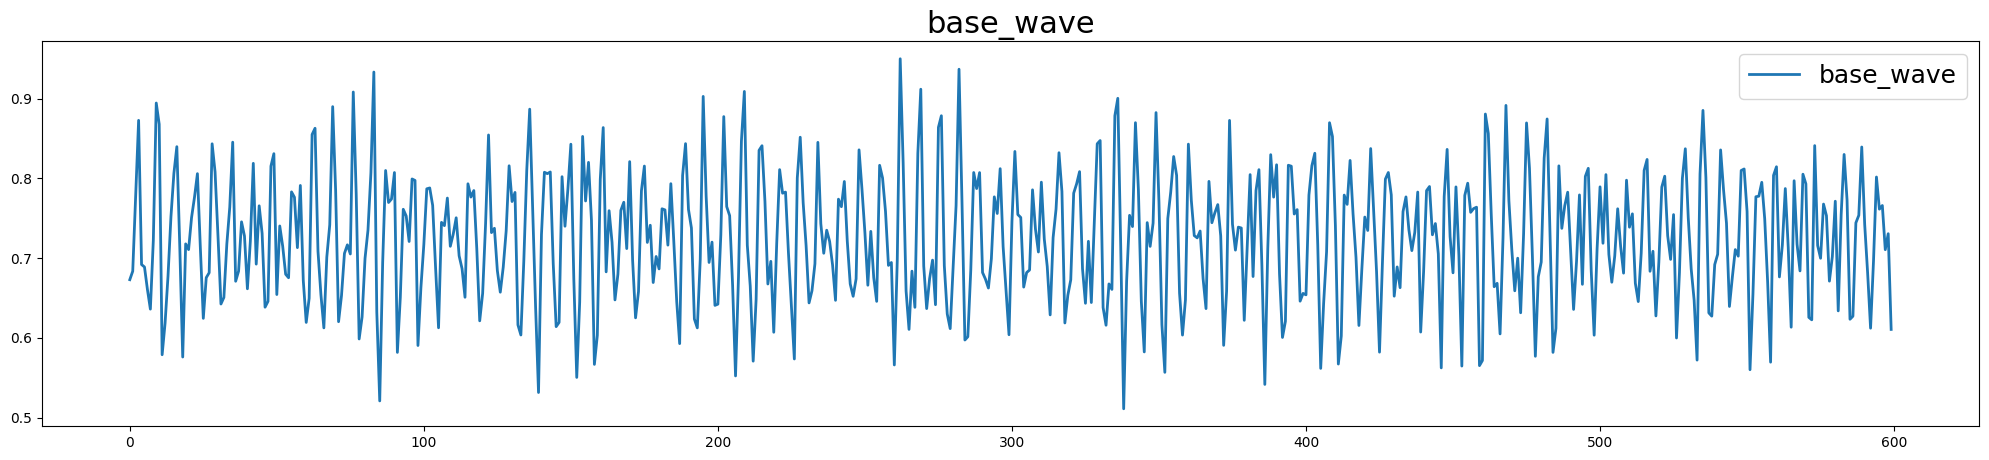

In [17]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=2)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [18]:
wave, interrupt_params = svg.add_interrupt_with_params(t, base_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.08, disperse=True, drop=drop, complex_iter=2)

(492, 540)
(194, 220)


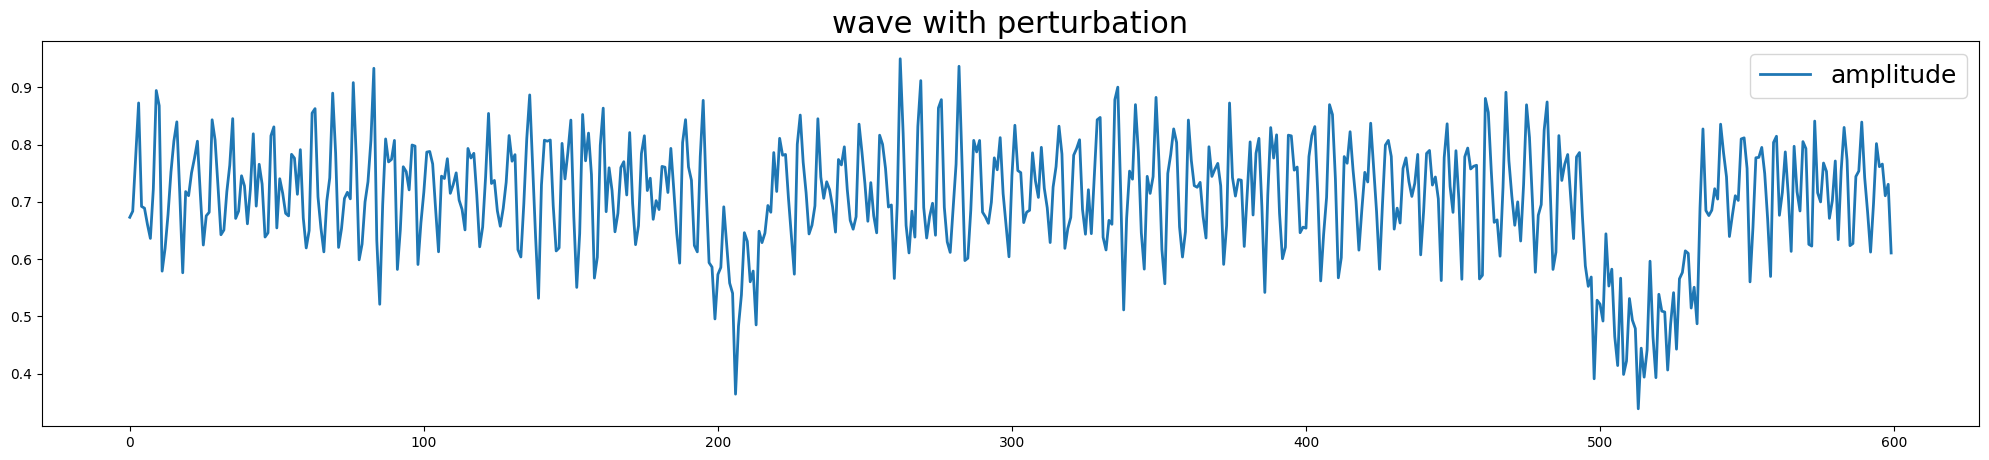

In [19]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='amplitude', linewidth=2)
plt.title(f"wave with perturbation", fontsize=22)
plt.legend(fontsize=18)
plt.show()